In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import warnings

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
RAW_DIR = "../data/raw"

df_fake = pd.read_csv(os.path.join(RAW_DIR, "Fake.csv"))
df_true = pd.read_csv(os.path.join(RAW_DIR, "True.csv"))

print(f"Fake news entries: {df_fake.shape[0]}")
print(f"Real news entries: {df_true.shape[0]}")
print("Columns:", df_fake.columns.tolist())

Fake news entries: 23481
Real news entries: 21417
Columns: ['title', 'text', 'subject', 'date']


In [4]:
df_fake["label"] = 0
df_true["label"] = 1

df = pd.concat([df_fake, df_true], ignore_index=True)
df = df[["title", "text", "subject", "date", "label"]]  # Reorder

print(f"Combined dataset shape: {df.shape}")
df.sample(5)

Combined dataset shape: (44898, 5)


,title,text,subject,date,label
28234,Senate panel passes bill to license advanced n...,(This March 22 story was corrected to remove ...,politicsNews,"March 22, 2017",1
2825,"After Months Of Concern Trolling, Trump Prove...",Amid one of the most racist presidential campa...,News,"January 26, 2017",0
9835,‘Die Hard’ Lion’s Fan Gives Best Ever #Boycott...,This heartfelt Facebook comment by a Detroit L...,politics,"Sep 24, 2017",0
18871,BARACK OBAMA’S NSA Susan Rice Ordered Spies To...,"While Obama hangs out in Tahiti, his NSA direc...",left-news,"Apr 4, 2017",0
30781,Trump University asks for trial delay until af...,CHICAGO (Reuters) - U.S. President-elect Donal...,politicsNews,"November 13, 2016",1


In [5]:
print("Missing values:\n", df.isnull().sum())
df.info()

Missing values:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [6]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
print("Invalid (NaT) dates:", df["date"].isna().sum())

Invalid (NaT) dates: 33030


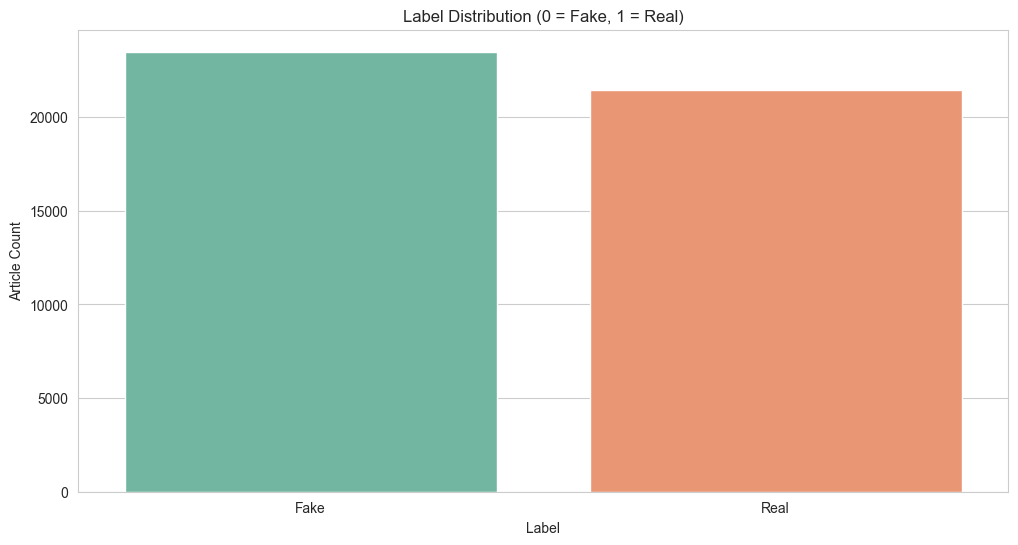

In [7]:
sns.countplot(data=df, x="label", palette="Set2")
plt.title("Label Distribution (0 = Fake, 1 = Real)")
plt.xlabel("Label")
plt.ylabel("Article Count")
plt.xticks(ticks=[0, 1], labels=["Fake", "Real"])
plt.show()

In [8]:
df["text_length"] = df["text"].astype(str).apply(lambda x: len(x.split()))
df["title_length"] = df["title"].astype(str).apply(lambda x: len(x.split()))

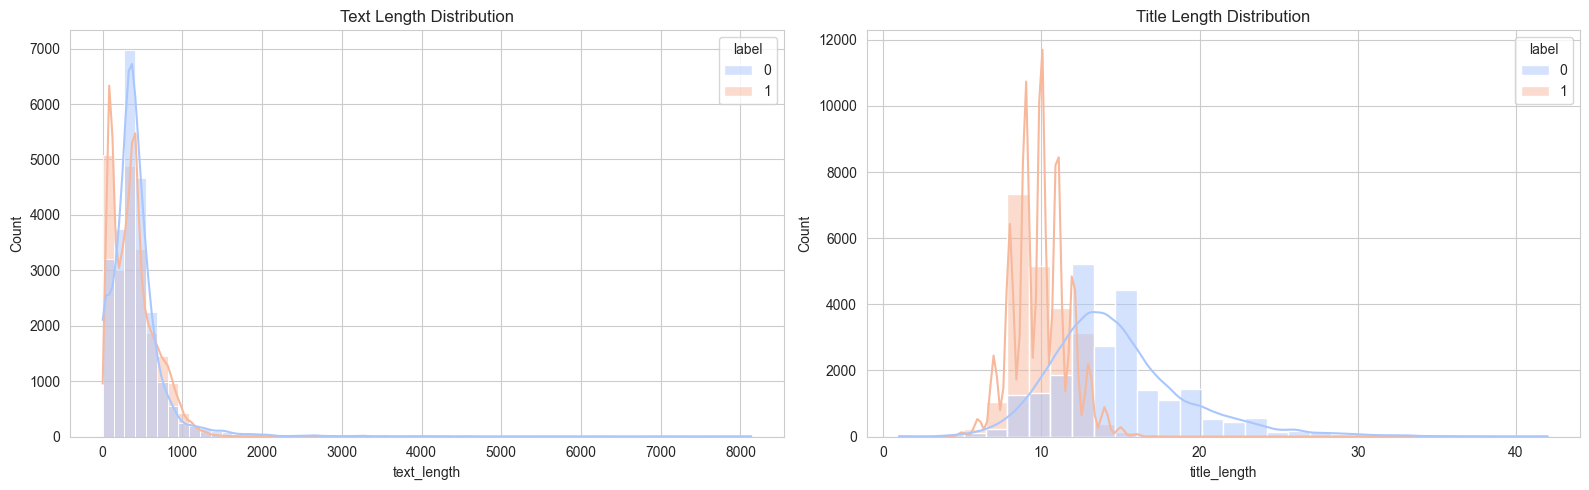

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(data=df, x="text_length", hue="label", bins=60, ax=axes[0], palette="coolwarm", kde=True)
axes[0].set_title("Text Length Distribution")

sns.histplot(data=df, x="title_length", hue="label", bins=30, ax=axes[1], palette="coolwarm", kde=True)
axes[1].set_title("Title Length Distribution")

plt.tight_layout()
plt.show()

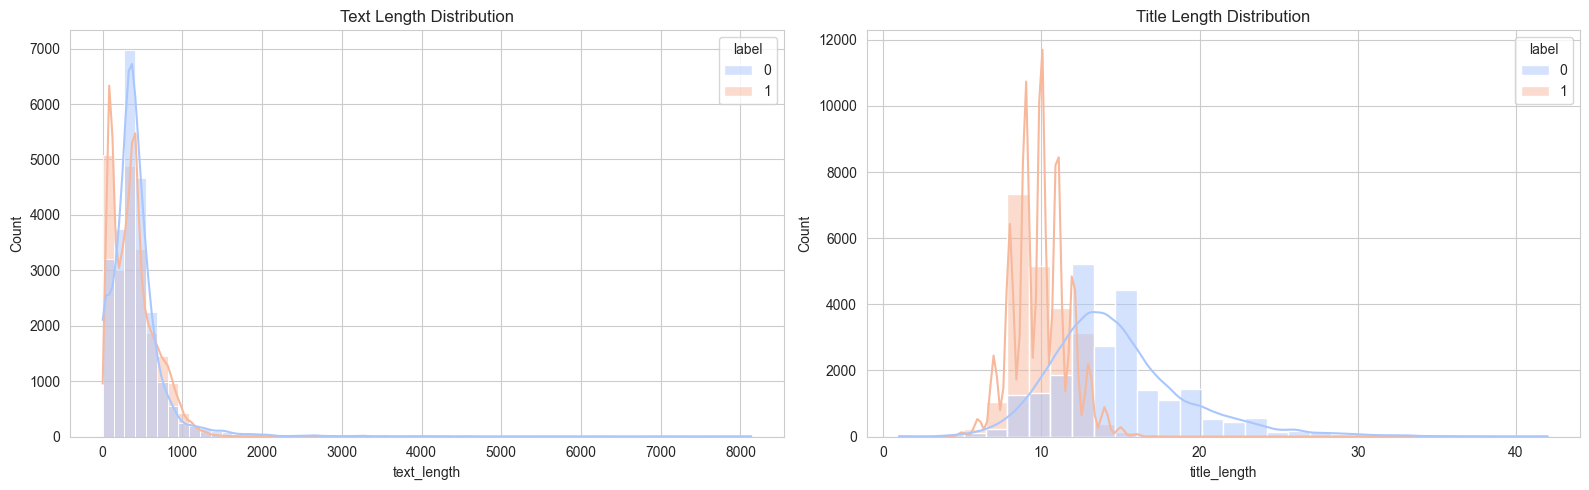

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(data=df, x="text_length", hue="label", bins=60, ax=axes[0], palette="coolwarm", kde=True)
axes[0].set_title("Text Length Distribution")

sns.histplot(data=df, x="title_length", hue="label", bins=30, ax=axes[1], palette="coolwarm", kde=True)
axes[1].set_title("Title Length Distribution")

plt.tight_layout()
plt.show()


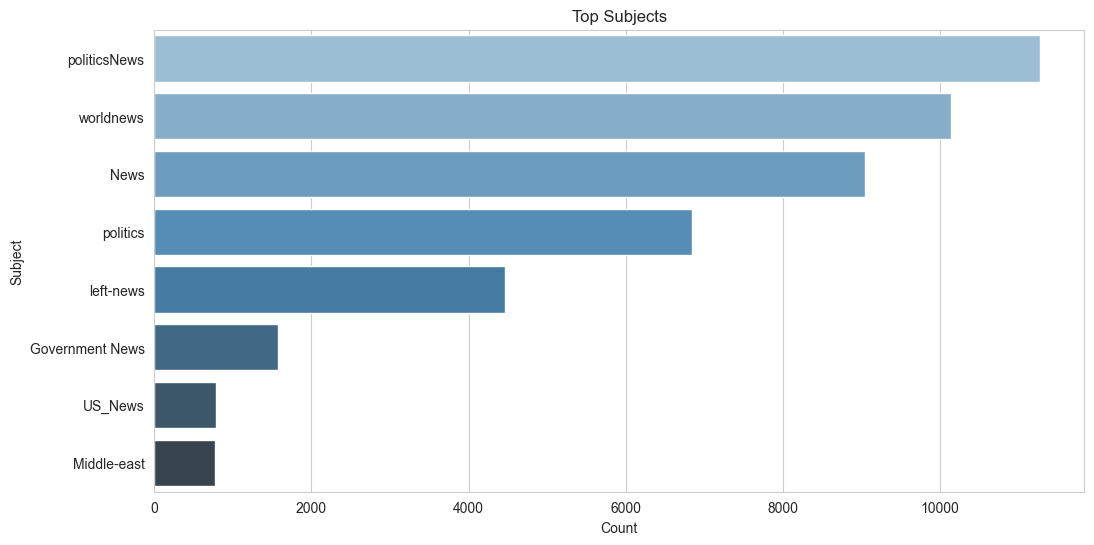

In [11]:
if "subject" in df.columns:
    top_subjects = df["subject"].value_counts().head(10)
    sns.barplot(y=top_subjects.index, x=top_subjects.values, palette="Blues_d")
    plt.title("Top Subjects")
    plt.xlabel("Count")
    plt.ylabel("Subject")
    plt.show()


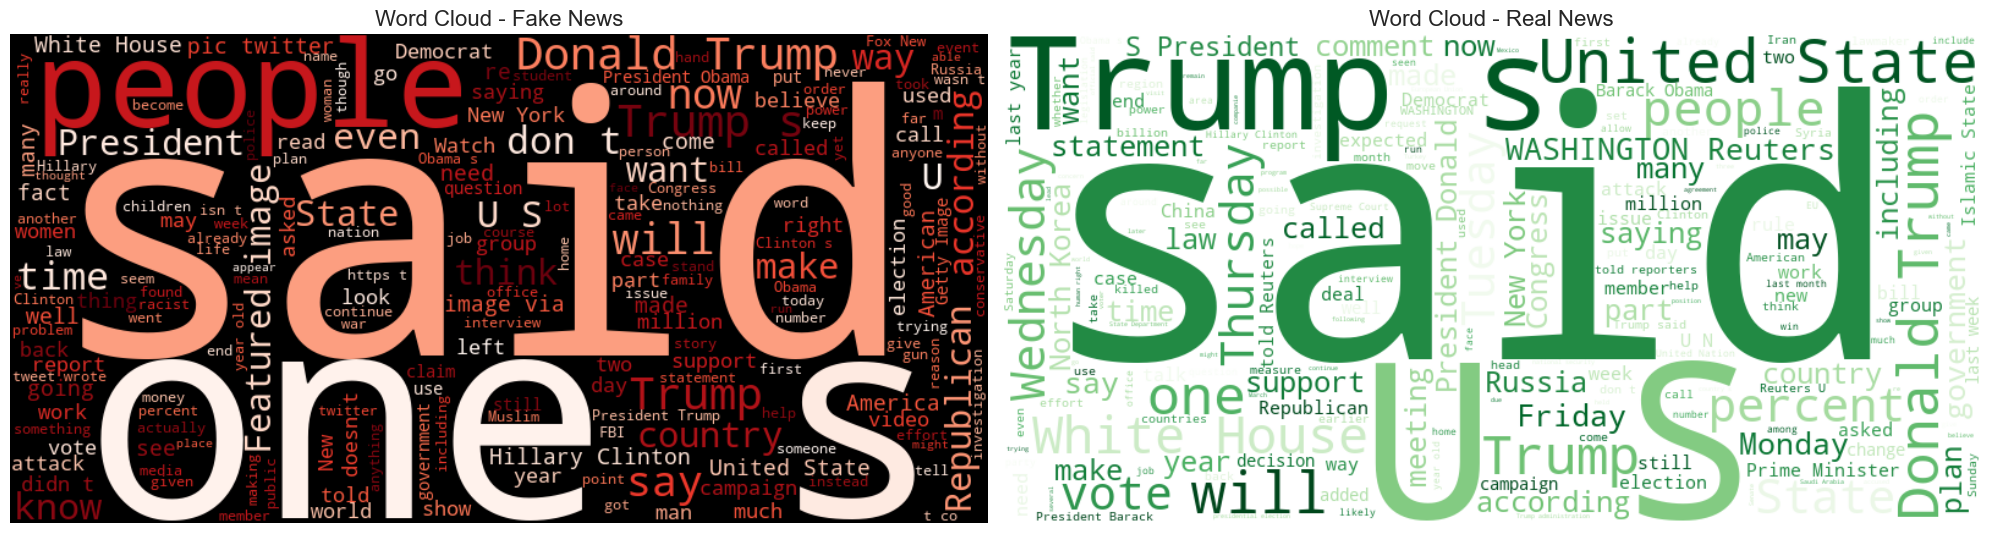

In [12]:
fake_text = " ".join(df[df["label"] == 0]["text"].astype(str))
real_text = " ".join(df[df["label"] == 1]["text"].astype(str))

wordcloud_fake = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(fake_text)
wordcloud_real = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(real_text)

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].imshow(wordcloud_fake, interpolation="bilinear")
axs[0].set_title("Word Cloud - Fake News", fontsize=16)
axs[0].axis("off")

axs[1].imshow(wordcloud_real, interpolation="bilinear")
axs[1].set_title("Word Cloud - Real News", fontsize=16)
axs[1].axis("off")

plt.tight_layout()
plt.show()


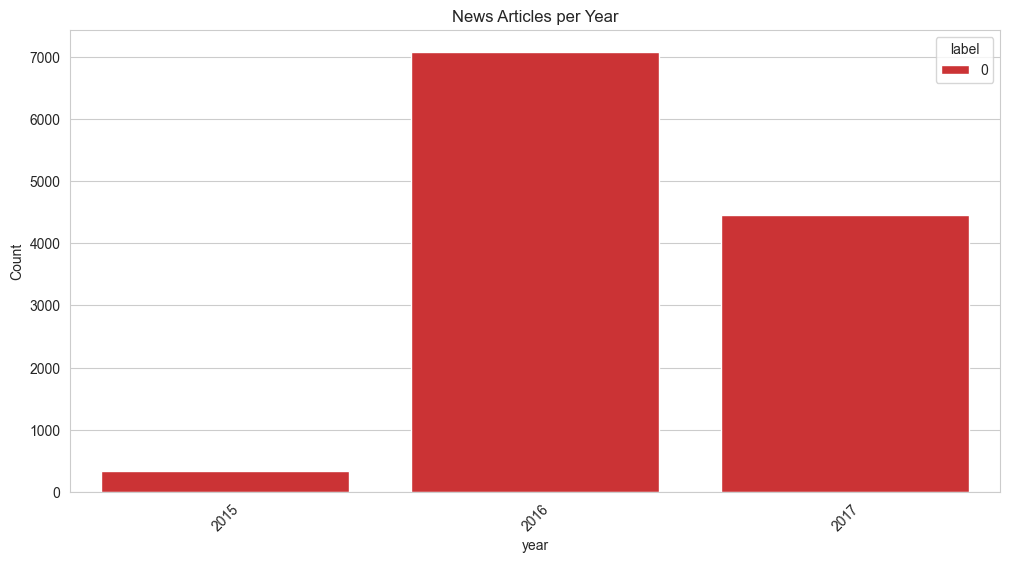

In [13]:
if df["date"].notna().sum() > 0:
    df_date = df.dropna(subset=["date"])
    df_date["year"] = df_date["date"].dt.year
    sns.countplot(data=df_date, x="year", hue="label", palette="Set1")
    plt.title("News Articles per Year")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()


In [14]:
os.makedirs("../data/interim", exist_ok=True)
df.to_csv("../data/interim/combined.csv", index=False)
print("✅ Combined data saved to: data/interim/combined.csv")


✅ Combined data saved to: data/interim/combined.csv
